### Imports

In [29]:
import pandas as pd
import numpy as n
import seaborn as sns
from urllib import request, parse
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import math

### Constants

In [2]:
tcp_url = 'http://tcpip.epfl.ch/output.php'
sciper = 219665
columns=['Sciper', 'Requests/s', 'Access Points', 'Servers', 'Theta', 'Packets/s', 'Collision Probability', 'Delay']

In [3]:
def get_res(columns, sciper, clients, apoints, servers):
    data = {'sciper':sciper, 'clients':clients, 'apoints':apoints, 'servers':servers}
    encoded_data = parse.urlencode(data).encode()
    # POST to the remote endpoint
    req =  request.Request(tcp_url, data=encoded_data)
    # This will contain the response page
    with request.urlopen(req) as resp:
        # Reads and decodes the body response data
        body_data = resp.read().decode('utf-8')
        soup = BeautifulSoup(body_data, 'html.parser')
        table = soup.find_all('table')[0]
        #make pandas dataframe from table & transpose for readability
        df = pd.read_html(str(table))[0].transpose()
        #drop useless columns
        df = df.drop(columns=[0,5])
        df.columns = columns
        #return dataframe
        return df.iloc[1]

In [4]:
get_res(columns, sciper, 100, 2, 3) 

Sciper                     219665
Requests/s                    100
Access Points                   2
Servers                         3
Theta                      95.478
Packets/s                 454.569
Collision Probability    0.019902
Delay                    0.622933
Name: 1, dtype: object

In [5]:
get_res(columns, sciper, 100, 2, 3) 

Sciper                     219665
Requests/s                    100
Access Points                   2
Servers                         3
Theta                       94.89
Packets/s                 413.817
Collision Probability     0.02316
Delay                    0.682548
Name: 1, dtype: object

In [27]:
#perform requests on simulation for given range of clients, access points and number of servers.
def get_values(columns, sciper, clients_min, clients_max, apoints_min, apoints_max, servers_min, servers_max):
    values = pd.DataFrame(columns=columns)
    for client in range(clients_min, clients_max):
        for apoint in range(apoints_min, apoints_max):
            for server in range(servers_min, servers_max):
                r = get_res(columns, sciper, client, apoint, server)
                values = values.append(r)
    values = values.reset_index(drop=True)
    return values

In [35]:
#plot values from responses
def plot_values(values):
    fig,axa = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
    aw = values.plot.line(x='Requests/s', y='Theta', ax=axa[0,0])
    ax = values.plot.line(x='Requests/s', y='Packets/s', ax=axa[0,1])
    ay = values.plot.line(x='Requests/s', y='Collision Probability', ax=axa[1,0])
    az = values.plot.line(x='Requests/s', y='Delay', ax=axa[1,1])

In [32]:
#get values for a given range of clients and corresponding ratio
def get_values_ratio(columns, sciper, clients_min, clients_max):
    values = pd.DataFrame(columns=columns)
    for client in range(clients_min, clients_max):
        r = get_res(columns, sciper, client, math.ceil(client/100.0), math.ceil(client/100.0))
        values = values.append(r)
    values = values.reset_index(drop=True)
    return values

In [33]:
values4 = get_values_ratio(columns, sciper, 1, 1001)

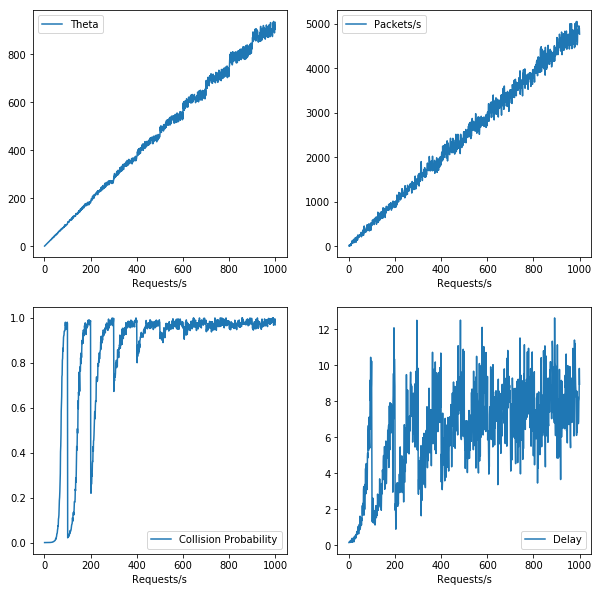

In [36]:
plot_values(values4)